# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to build a predictive model and determine the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

## 1. Hypothesis Generation

This is a significant step in the process of analyzing data. It involves understanding the problem at hand and making a hypothesis about what could potentially have a good impact on the outcome. 

This is accomplished **before** looking at the data. We will have a list of the different analyses we can potentially perform if the data is available. 

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

----------

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [1]:
# ! pip install pandas-profiling
# !pip install --upgrade jupyterlab
# !pip install --upgrade pandas
# !conda update pandas

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from pandas_profiling import ProfileReport

#Read files:
data = pd.read_csv("data/regression_exercise.csv", delimiter=',')

# prof = ProfileReport(data)
# prof.to_file(output_file='output.html')

In [5]:
data.shape

(8523, 12)

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


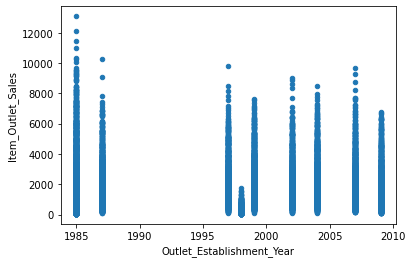

In [86]:
#scatter plot 

var = 'Outlet_Establishment_Year'
data = data[['Item_Outlet_Sales',var]]
data.plot.scatter(x=var, y='Item_Outlet_Sales');



In [85]:
# var = 'Item_Fat_Content'  
# data = data[['Item_Outlet_Sales',var]]
# data.plot.scatter(x=var, y='Item_Outlet_Sales');

## **Task:** 
One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
total = data.isnull().sum().sort_values(ascending=False)
total

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data.isnull().count()

Item_Identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [11]:
percent= (data.isnull().sum() /data.isnull().count()).sort_values(ascending=False)
percent

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [12]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


In [13]:
missing_data.head()

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000


In [ ]:
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()

## **Task:**
Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do the min & max values make sense?

In [30]:
# data.dtypes

In [35]:
#  Pull out the numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_data = data.select_dtypes(include=numerics)
numeric_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [36]:
numeric_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# - item_visibility min is zero - is this intentional?
# - item_mrp min seems low, high seems high - what are they selling?


In [39]:
column_list = numeric_data.columns.tolist()
numeric_data.columns.tolist()

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

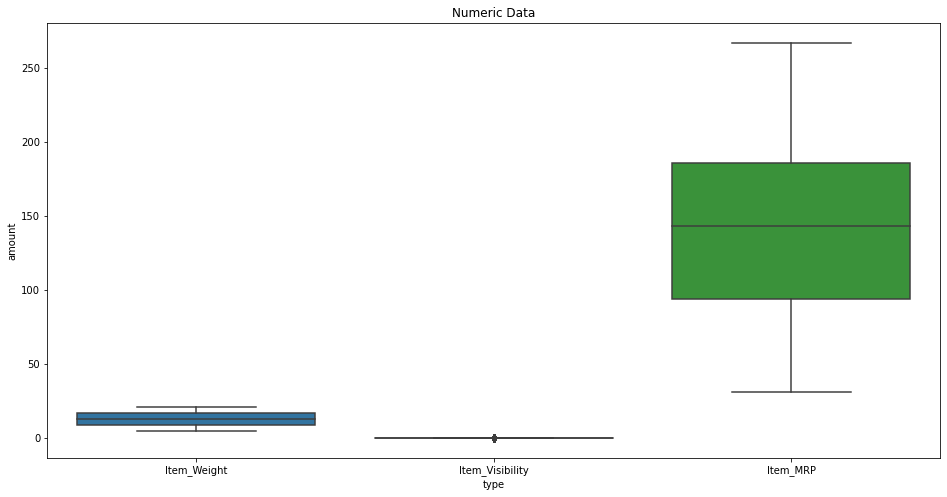

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# box_data = numeric_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
box_data = numeric_data[['Item_Weight','Item_Visibility','Item_MRP']]
# ax = sns.boxplot(data=df, orient="h", palette="Set2")
# plt.title('Pokemon Box Plot')
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=box_data)
# sns.set_palette(palette="crest", n_colors=1)
# sns.color_palette("crest", as_cmap=True)
plt.ylabel('amount')
# plt.xlabel
ax.set(title='Numeric Data', xlabel="type");

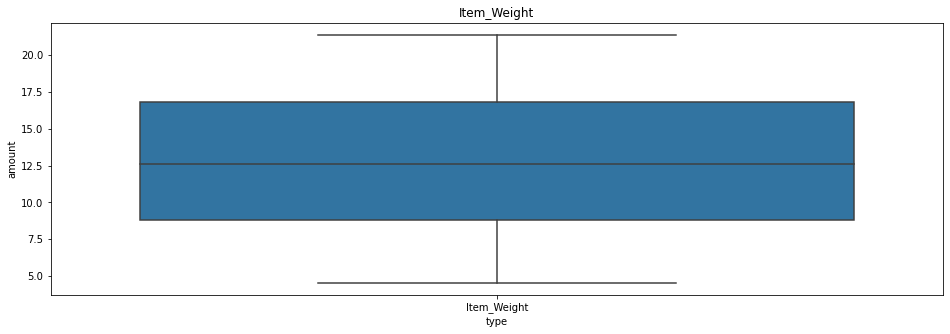

In [44]:

box_data = numeric_data[['Item_Weight']]
plt.figure(figsize=(16,5))
ax = sns.boxplot(data=box_data)
plt.ylabel('amount')

ax.set(title='Item_Weight', xlabel="type");

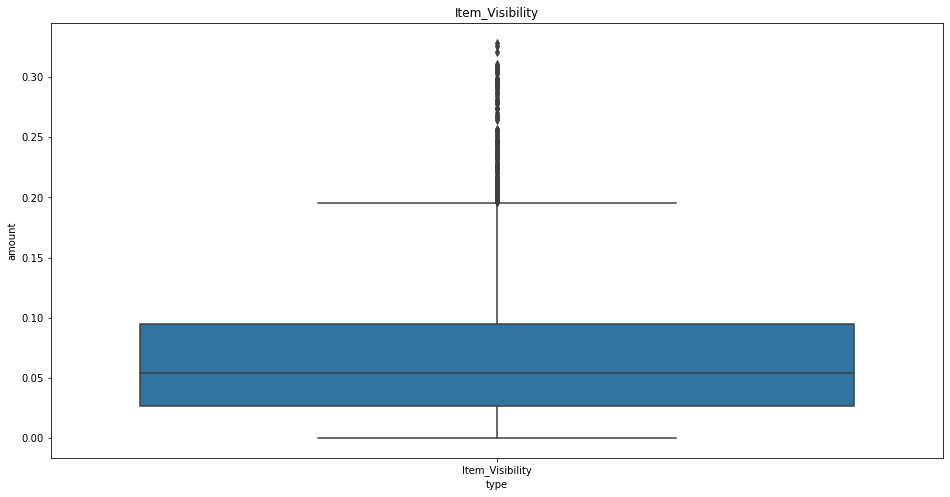

In [46]:
box_data = numeric_data[['Item_Visibility']]
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=box_data)
plt.ylabel('amount')

ax.set(title='Item_Visibility', xlabel="type");

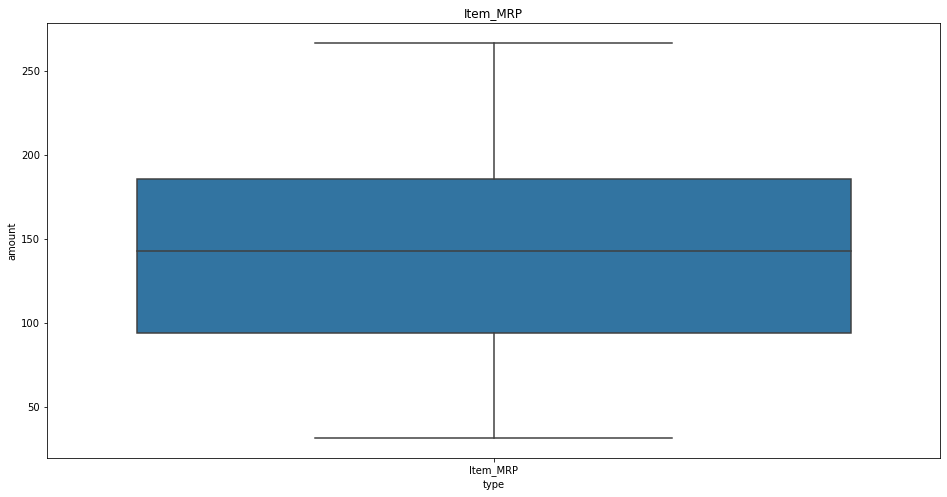

In [47]:
box_data = numeric_data[['Item_MRP']]
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=box_data)
plt.ylabel('amount')

ax.set(title='Item_MRP', xlabel="type");

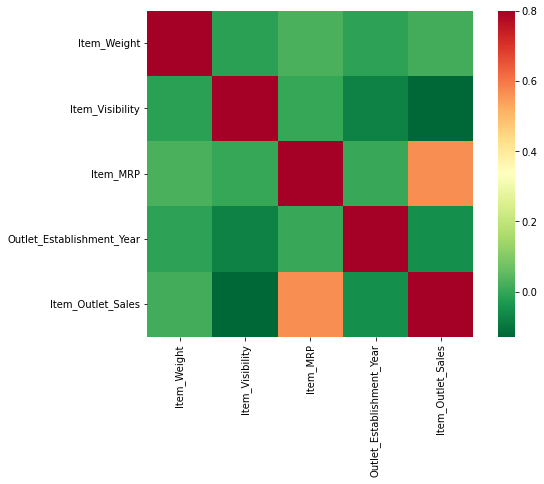

In [88]:
#correlation matrix

corrmat = numeric_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r");

## **Task:** 
Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [49]:
#  Pull out the numeric variables
categories = ['object']

cat_data = data.select_dtypes(include=categories)
cat_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [50]:
cat_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## **Task:** 
How many products are there, how many stores, item types?


In [56]:
print(len(cat_data['Item_Identifier'].unique()),  'products(items)')
print(len(cat_data['Outlet_Identifier'].unique()),  'stores')
print(len(cat_data['Item_Type'].unique()), 'Item Types')

1559 products(items)
10 stores
16 Item Types


## **Task:** 
Explore the numbers of each categorical variable.

In [70]:
print('Fat Content\n',cat_data['Item_Fat_Content'].unique().tolist(), '\n')
print('Item Type\n',cat_data['Item_Type'].unique().tolist(), '\n')
print('Outlet Size\n',cat_data['Outlet_Size'].unique().tolist(), '\n')
print('Outlet Location Type\n',cat_data['Outlet_Location_Type'].unique().tolist(), '\n')
print('Outlet Type\n',cat_data['Outlet_Type'].unique().tolist(), '\n')

Fat Content
 ['Low Fat', 'Regular', 'low fat', 'LF', 'reg'] 

Item Type
 ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood'] 

Outlet Size
 ['Medium', nan, 'High', 'Small'] 

Outlet Location Type
 ['Tier 1', 'Tier 3', 'Tier 2'] 

Outlet Type
 ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3'] 



Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

-----------

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy; zero filling, mean, & median values. Maybe mean values per `Item_Type`.

**Stretch:** What happens when we fill our missing values with mean vs. median?

In [100]:
cat_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [92]:
cat_data[['Item_Type']].isnull()

,Item_Type
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [102]:
numeric_data['Item_Weight'].isnull().sum()

1463

In [104]:
numeric_data['Item_Weight'].mean()

12.857645184136183

In [106]:
numeric_data['Item_Weight'].median()

12.6

In [114]:
# numeric_data['Item_Weight'].replace(np.NaN, numeric_data['Item_Weight'].mean())
numeric_data['Item_Weight'] = numeric_data['Item_Weight'].fillna(numeric_data['Item_Weight'].mean())

**Task:** Check if there are no more missing values.

In [115]:
numeric_data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64